In [1]:
import models
from models import model, glrt, create_cd_cluster
import pandas as pd
import numpy as np
from dataset_management import get_dataset

algorithm="algorithm";benchmark="bench_prior";seed="seed";time="used_fidelity"
algos=["pb_mutation_dynamic_geometric-default-at-target","random_search","hyperband"]
fs=[24]
f_space=np.linspace(1,max(fs),max(fs)).tolist()
benchmarks=["jahs_cifar10","jahs_colorectal_histology","jahs_fashion_mnist","lcbench-126026","lcbench-167190","lcbench-168330","lcbench-168910","lcbench-189906","cifar100_wideresnet_2048","imagenet_resnet_512","lm1b_transformer_2048","translatewmt_xformer_64"]
label_dict={'random_search': 'RS', 'hyperband': 'HB', 'pb_mutation_dynamic_geometric-default-at-target': 'PB', 'jahs_cifar10': 'JAHS-C10', 'jahs_colorectal_histology': 'JAHS-CH', 'jahs_fashion_mnist': 'JAHS-FM', 'lcbench-126026': 'LC-126026', 'lcbench-167190': 'LC-167190', 'lcbench-168330': 'LC-168330', 'lcbench-168910': 'LC-168910', 'lcbench-189906': 'LC-189906', 'cifar100_wideresnet_2048': 'PD1-Cifar100', 'imagenet_resnet_512': 'PD1-ImageNet', 'lm1b_transformer_2048': 'PD1-LM1B', 'translatewmt_xformer_64': 'PD1-WMT',"random_search_prior":"RS+Prior","bo":"BO","pibo":"PiBO","bohb":"BOHB","priorband_bo":"PriorBand+BO"}

data_pibo=get_dataset(dataset_name="fig7_24_at25_bad_intsteps")
data_pb=get_dataset(dataset_name="fig5_24_at25_bad_intsteps")

In [2]:
loss="value"
p_data=data_pibo.loc[data_pibo["bench_prior"].str.contains("bad")]
p_data=p_data.loc[~(p_data[benchmark].str.contains("former"))&~(p_data[benchmark].str.contains("net"))]

result_cluster={}
fs=[1,5,10,15,20,24]
for f in fs:
    result_cluster[f]={}
    f_data=p_data.loc[p_data[time]==f]
    result_cluster[f]["m0'"]=model(formula=f"{loss}~{algorithm}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m0"]=model(formula=f"{loss}~{algorithm}+(1|{benchmark})",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m1"]=model(formula=f"{loss}~{algorithm}+{benchmark}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m2"]=model(formula=f"{loss}~{algorithm}+{benchmark}+{algorithm}:{benchmark}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m4"]=model(formula=f"{loss}~{algorithm}:{benchmark}+{time}",data=f_data).post_hoc(marginal_vars=algorithm)
    result_cluster[f]["m4'"]=model(formula=f"{loss}~{algorithm}:{benchmark}+{time}+({algorithm}:{benchmark}):{time}",data=f_data).post_hoc(marginal_vars=algorithm)



boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 estimates
boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 10 

In [3]:
for f in result_cluster.keys():
    for m in result_cluster[f]:
        print(f"Fidelity: {f}, Model: {m}")
        print(result_cluster[f][m])

Fidelity: 1, Model: m0'
(      algorithm  Estimate  2.5_ci  97.5_ci     SE      DF
1      RS+Prior    24.433  21.815   27.051  1.335  3000.0
2  PriorBand+BO    24.433  21.815   27.051  1.335  3000.0
3          PiBO    24.433  21.815   27.051  1.335  3000.0
4            BO     5.201   2.583    7.820  1.335  3000.0
5          BOHB     7.025   4.406    9.643  1.335  3000.0,                        Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val  Sig
1   (RS+Prior) - (PriorBand+BO)    -0.000  -5.154    5.154  1.888  3000.0  -0.000  1.000     
2             (RS+Prior) - PiBO    -0.000  -5.154    5.154  1.888  3000.0  -0.000  1.000     
3               (RS+Prior) - BO    19.231  14.077   24.386  1.888  3000.0  10.184  0.000  ***
4             (RS+Prior) - BOHB    17.408  12.254   22.562  1.888  3000.0   9.219  0.000  ***
5         (PriorBand+BO) - PiBO    -0.000  -5.154    5.154  1.888  3000.0  -0.000  1.000     
6           (PriorBand+BO) - BO    19.231  14.077   24.386  1.

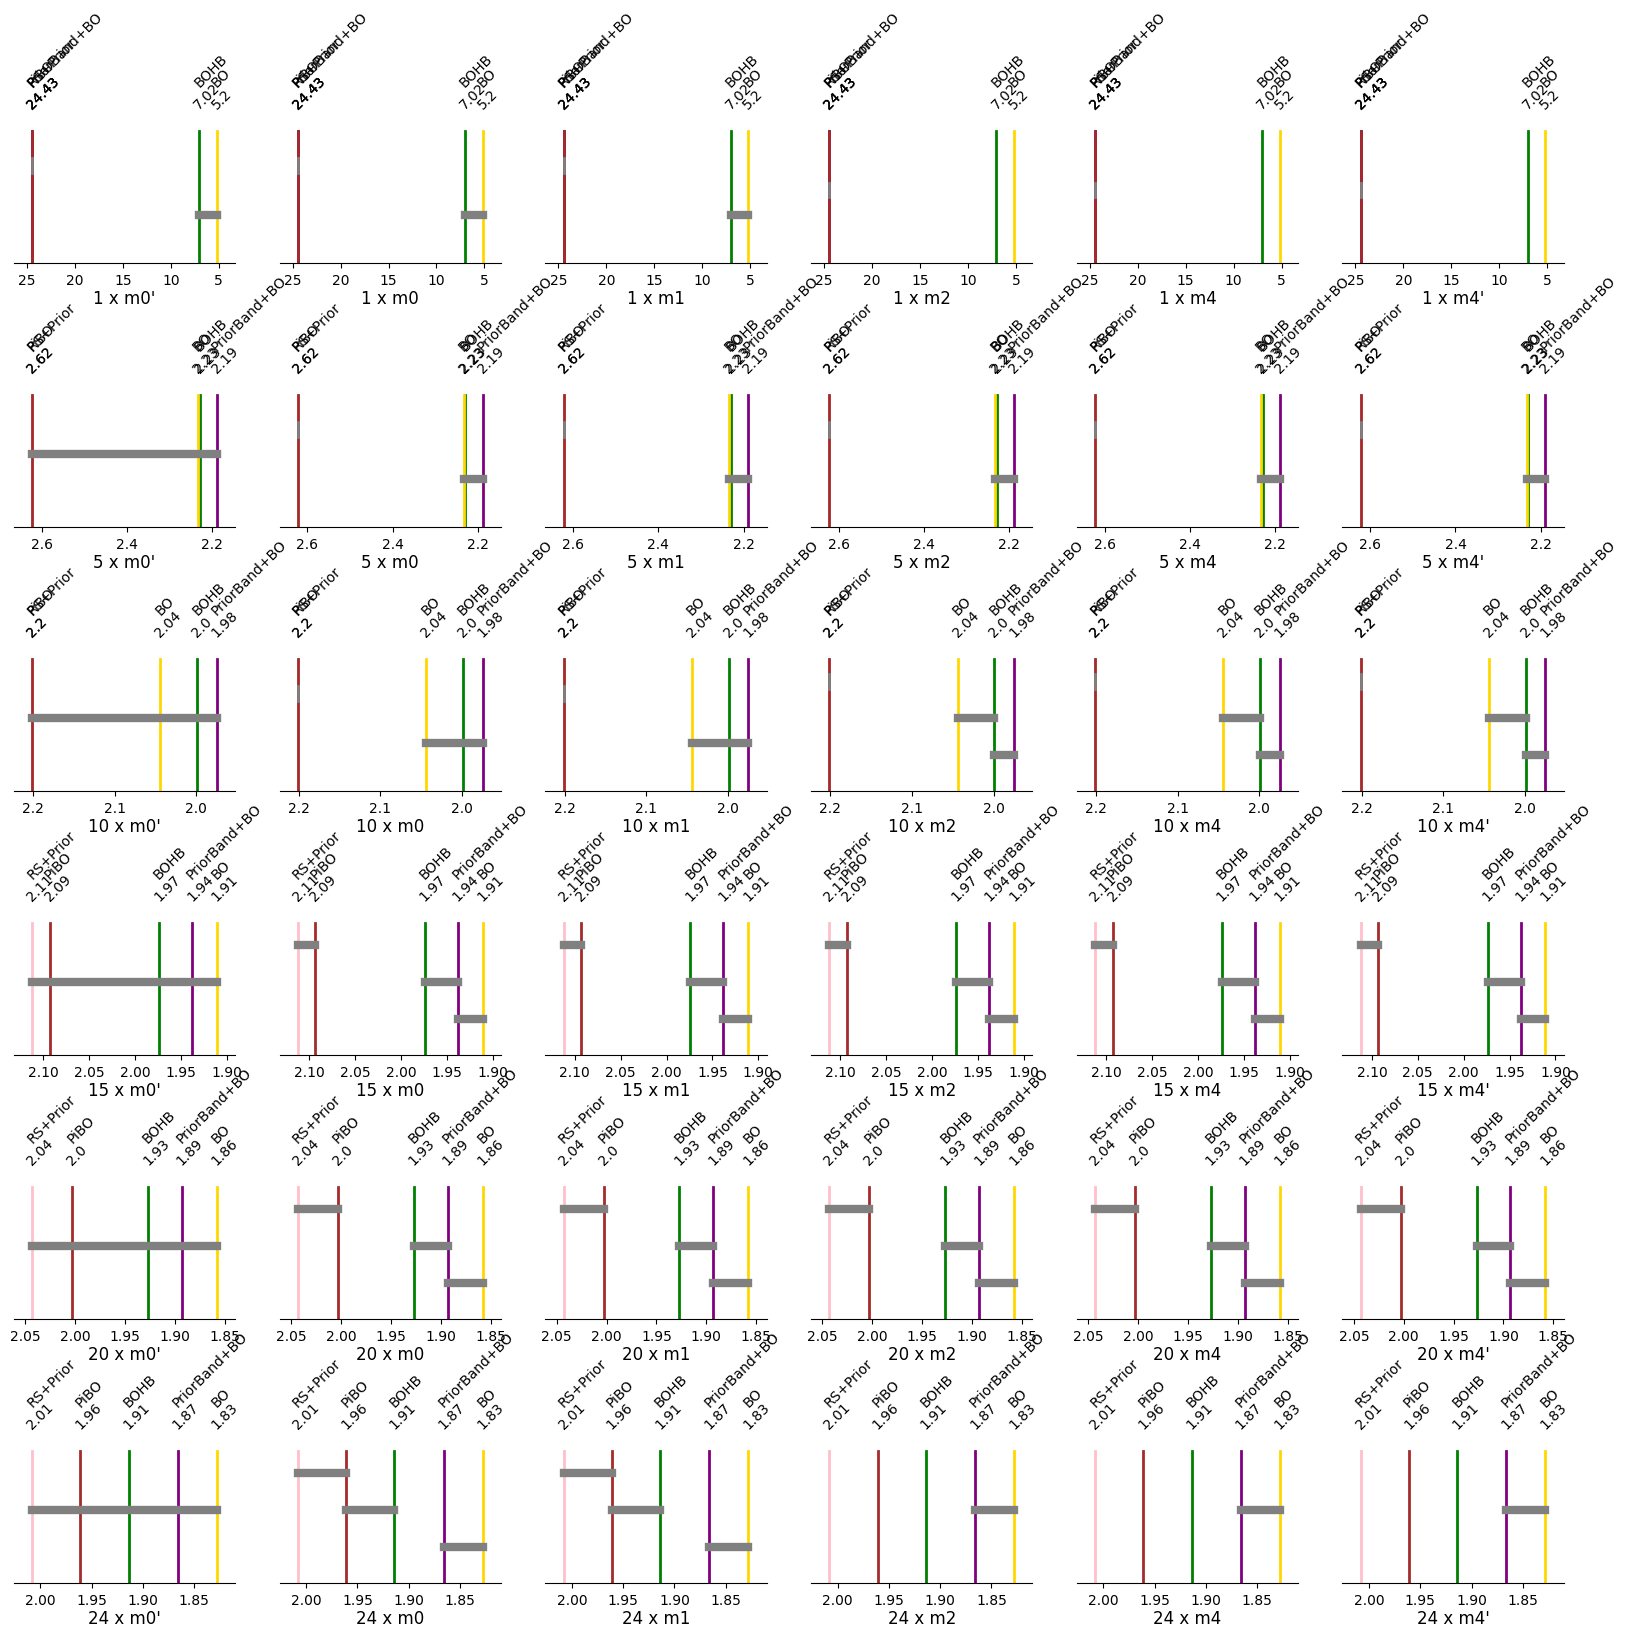

(<Figure size 2000x2000 with 36 Axes>,
 array([[<AxesSubplot: title={'center': "1 x m0'"}>,
         <AxesSubplot: title={'center': '1 x m0'}>,
         <AxesSubplot: title={'center': '1 x m1'}>,
         <AxesSubplot: title={'center': '1 x m2'}>,
         <AxesSubplot: title={'center': '1 x m4'}>,
         <AxesSubplot: title={'center': "1 x m4'"}>],
        [<AxesSubplot: title={'center': "5 x m0'"}>,
         <AxesSubplot: title={'center': '5 x m0'}>,
         <AxesSubplot: title={'center': '5 x m1'}>,
         <AxesSubplot: title={'center': '5 x m2'}>,
         <AxesSubplot: title={'center': '5 x m4'}>,
         <AxesSubplot: title={'center': "5 x m4'"}>],
        [<AxesSubplot: title={'center': "10 x m0'"}>,
         <AxesSubplot: title={'center': '10 x m0'}>,
         <AxesSubplot: title={'center': '10 x m1'}>,
         <AxesSubplot: title={'center': '10 x m2'}>,
         <AxesSubplot: title={'center': '10 x m4'}>,
         <AxesSubplot: title={'center': "10 x m4'"}>],
        [<

In [4]:
create_cd_cluster(result_cluster)